_________

Содержание <br>

[1. Описание данных](#1.-Описание-данных)<br>
[2. Исследование зависимостей и формулирование гипотез](#2.-Исследование-зависимостей-и-формулирование-гипотез)<br>
[3. Построение моделей для прогнозирования оттока](#3.-Построение-моделей-для-прогнозирования-оттока)<br>
[4. Сравнение качества моделей](#4.-Сравнение-качества-моделей) <br>


# 1. Описание данных

In [1]:
import pandas as pd
import re
import numpy as np

import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

# import warnings
# warnings.filterwarnings('ignore')

In [2]:
data = pd.read_csv('telecom_users.csv')
data.head()

,Unnamed: 0,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,1869,7010-BRBUU,Male,0,Yes,Yes,72,Yes,Yes,No,...,No internet service,No internet service,No internet service,No internet service,Two year,No,Credit card (automatic),24.10,1734.65,No
1,4528,9688-YGXVR,Female,0,No,No,44,Yes,No,Fiber optic,...,Yes,No,Yes,No,Month-to-month,Yes,Credit card (automatic),88.15,3973.2,No
2,6344,9286-DOJGF,Female,1,Yes,No,38,Yes,Yes,Fiber optic,...,No,No,No,No,Month-to-month,Yes,Bank transfer (automatic),74.95,2869.85,Yes
3,6739,6994-KERXL,Male,0,No,No,4,Yes,No,DSL,...,No,No,No,Yes,Month-to-month,Yes,Electronic check,55.90,238.5,No
4,432,2181-UAESM,Male,0,No,No,2,Yes,No,DSL,...,Yes,No,No,No,Month-to-month,No,Electronic check,53.45,119.5,No


In [3]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5986 entries, 0 to 5985
Data columns (total 22 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   Unnamed: 0        5986 non-null   int64  
 1   customerID        5986 non-null   object 
 2   gender            5986 non-null   object 
 3   SeniorCitizen     5986 non-null   int64  
 4   Partner           5986 non-null   object 
 5   Dependents        5986 non-null   object 
 6   tenure            5986 non-null   int64  
 7   PhoneService      5986 non-null   object 
 8   MultipleLines     5986 non-null   object 
 9   InternetService   5986 non-null   object 
 10  OnlineSecurity    5986 non-null   object 
 11  OnlineBackup      5986 non-null   object 
 12  DeviceProtection  5986 non-null   object 
 13  TechSupport       5986 non-null   object 
 14  StreamingTV       5986 non-null   object 
 15  StreamingMovies   5986 non-null   object 
 16  Contract          5986 non-null   object 


In [4]:
# Удалим столбцы, которые не несут никакую полезную для анализа информацию
data = data.drop(['Unnamed: 0', 'customerID'], axis=1) 
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5986 entries, 0 to 5985
Data columns (total 20 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   gender            5986 non-null   object 
 1   SeniorCitizen     5986 non-null   int64  
 2   Partner           5986 non-null   object 
 3   Dependents        5986 non-null   object 
 4   tenure            5986 non-null   int64  
 5   PhoneService      5986 non-null   object 
 6   MultipleLines     5986 non-null   object 
 7   InternetService   5986 non-null   object 
 8   OnlineSecurity    5986 non-null   object 
 9   OnlineBackup      5986 non-null   object 
 10  DeviceProtection  5986 non-null   object 
 11  TechSupport       5986 non-null   object 
 12  StreamingTV       5986 non-null   object 
 13  StreamingMovies   5986 non-null   object 
 14  Contract          5986 non-null   object 
 15  PaperlessBilling  5986 non-null   object 
 16  PaymentMethod     5986 non-null   object 


In [5]:
# параметр 'TotalCharges' некорректного формата,
# чтобы заменить формат на float, нужно заполнить пропущенные значения 0, 
# так как скорее всего эти клиенты еще ничего не покупали
data.TotalCharges.replace(' ', 0, inplace=True)
data.TotalCharges.replace(' ', 0, inplace=True)
data.TotalCharges = data.TotalCharges.astype(float)

In [6]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5986 entries, 0 to 5985
Data columns (total 20 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   gender            5986 non-null   object 
 1   SeniorCitizen     5986 non-null   int64  
 2   Partner           5986 non-null   object 
 3   Dependents        5986 non-null   object 
 4   tenure            5986 non-null   int64  
 5   PhoneService      5986 non-null   object 
 6   MultipleLines     5986 non-null   object 
 7   InternetService   5986 non-null   object 
 8   OnlineSecurity    5986 non-null   object 
 9   OnlineBackup      5986 non-null   object 
 10  DeviceProtection  5986 non-null   object 
 11  TechSupport       5986 non-null   object 
 12  StreamingTV       5986 non-null   object 
 13  StreamingMovies   5986 non-null   object 
 14  Contract          5986 non-null   object 
 15  PaperlessBilling  5986 non-null   object 
 16  PaymentMethod     5986 non-null   object 


In [8]:
# Посчитаем основные статистики для кол-ва месяцев, месячной платы и общей платы за услуги
data[['tenure', 'MonthlyCharges', 'TotalCharges']].describe()

,tenure,MonthlyCharges,TotalCharges
count,5986.000000,5986.000000,5986.000000
mean,32.468760,64.802213,2294.221559
std,24.516391,30.114702,2274.164124
min,0.000000,18.250000,0.000000
25%,9.000000,35.650000,401.587500
50%,29.000000,70.400000,1408.575000
75%,56.000000,89.900000,3841.500000
max,72.000000,118.750000,8684.800000


In [9]:
# Статистика для категориальных переменных
data.describe(include=[object, bool])

,gender,Partner,Dependents,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,Churn
count,5986,5986,5986,5986,5986,5986,5986,5986,5986,5986,5986,5986,5986,5986,5986,5986
unique,2,2,2,2,3,3,3,3,3,3,3,3,3,2,4,2
top,Male,No,No,Yes,No,Fiber optic,No,No,No,No,No,No,Month-to-month,Yes,Electronic check,No
freq,3050,3082,4195,5396,2848,2627,2982,2605,2640,2960,2389,2356,3269,3528,2006,4399


In [10]:
# Проверим отсутствующие значения
data.isna().sum()

gender              0
SeniorCitizen       0
Partner             0
Dependents          0
tenure              0
PhoneService        0
MultipleLines       0
InternetService     0
OnlineSecurity      0
OnlineBackup        0
DeviceProtection    0
TechSupport         0
StreamingTV         0
StreamingMovies     0
Contract            0
PaperlessBilling    0
PaymentMethod       0
MonthlyCharges      0
TotalCharges        0
Churn               0
dtype: int64

# 2. Исследование зависимостей и формулирование гипотез

In [11]:
# Числовые признаки
num_cols = ['tenure', 'MonthlyCharges', 'TotalCharges']

# Категориальные признаки
cat_cols = [
    'gender', 'SeniorCitizen', 'Partner', 'Dependents', 'PhoneService',
    'MultipleLines', 'InternetService',
    'OnlineSecurity', 'OnlineBackup', 'DeviceProtection',
    'TechSupport', 'StreamingTV', 'StreamingMovies',
    'Contract', 'PaperlessBilling', 'PaymentMethod'
]

feature_cols = num_cols + cat_cols
target_col = 'Churn'



Графики histplot и boxplot для числовых признаков

Признак: tenure


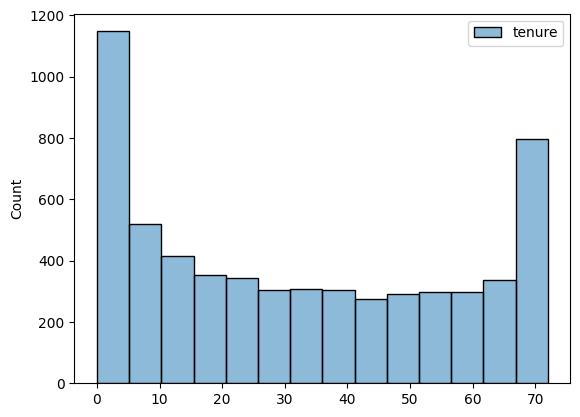

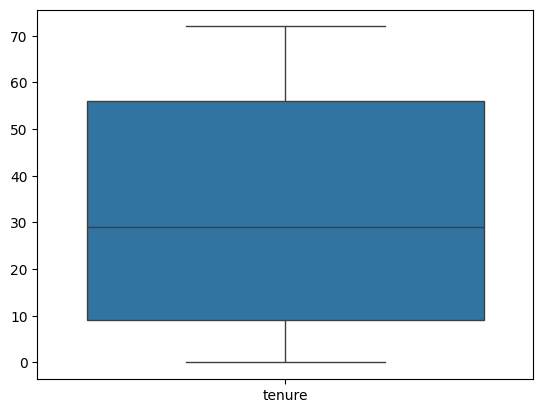

Признак: MonthlyCharges


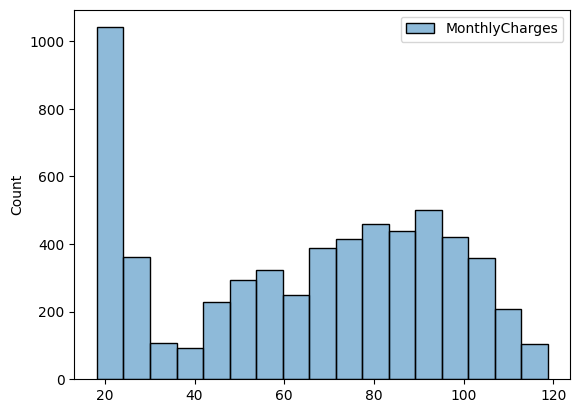

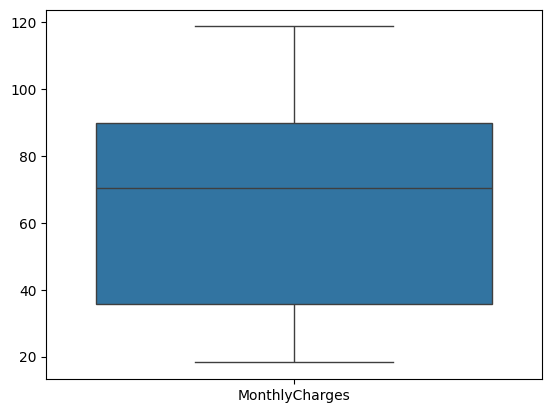

Признак: TotalCharges


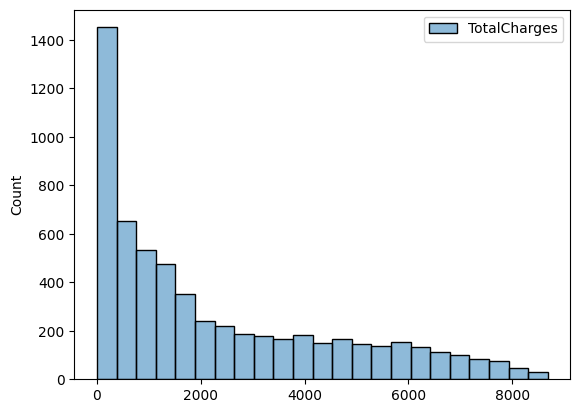

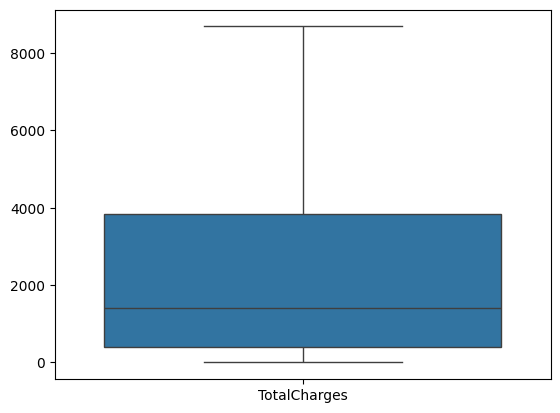

In [12]:
for element in num_cols:
    print(f'Признак: {element}')
    sns.histplot(data[[element]])
    plt.show()

    sns.boxplot(data[[element]])
    plt.show()

Графики barplot и процентное соотношение для категориальных признаков

gender
Male      3050
Female    2936
Name: count, dtype: int64



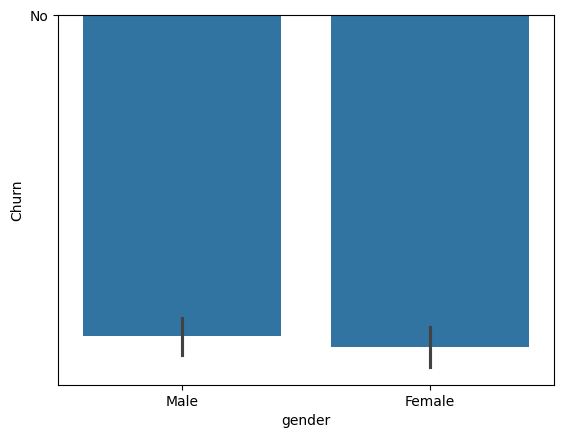

SeniorCitizen
0                5020
1                 966
Name: count, dtype: int64



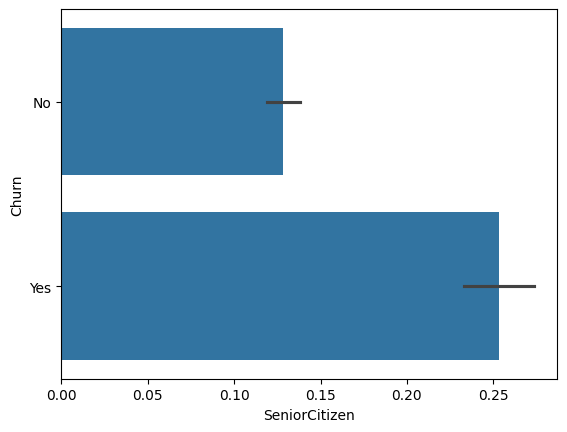

Partner
No         3082
Yes        2904
Name: count, dtype: int64



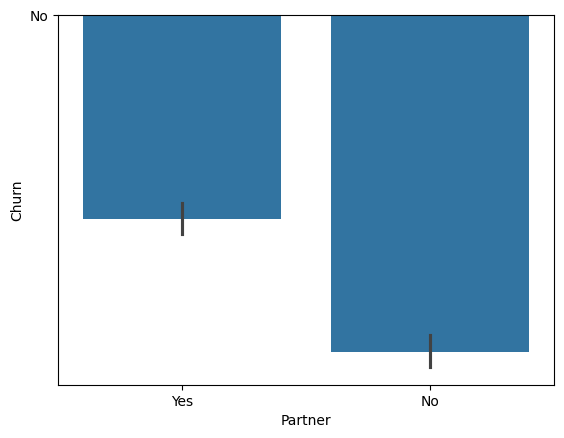

Dependents
No            4195
Yes           1791
Name: count, dtype: int64



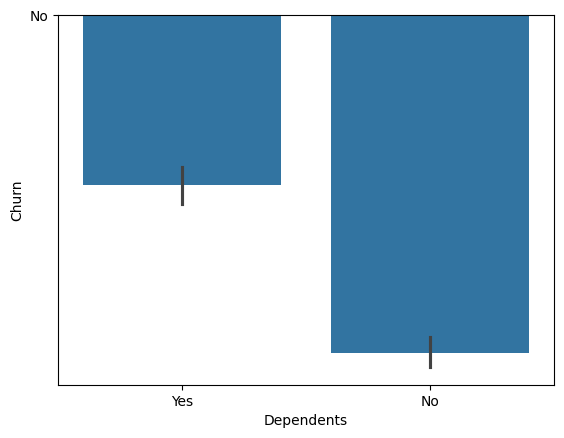

PhoneService
Yes             5396
No               590
Name: count, dtype: int64



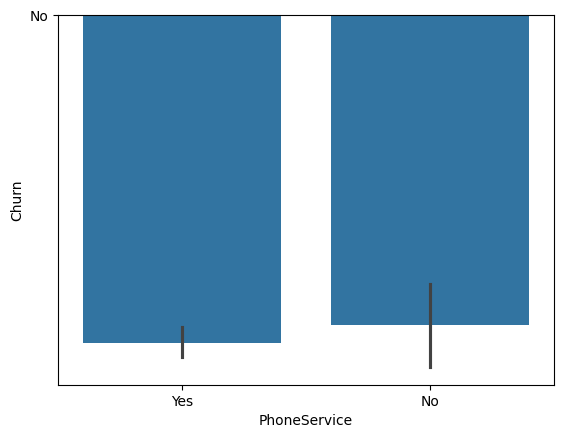

MultipleLines   
No                  2848
Yes                 2548
No phone service     590
Name: count, dtype: int64



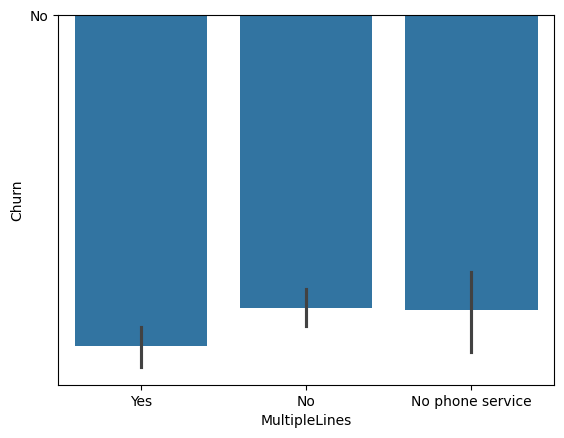

InternetService
Fiber optic        2627
DSL                2068
No                 1291
Name: count, dtype: int64



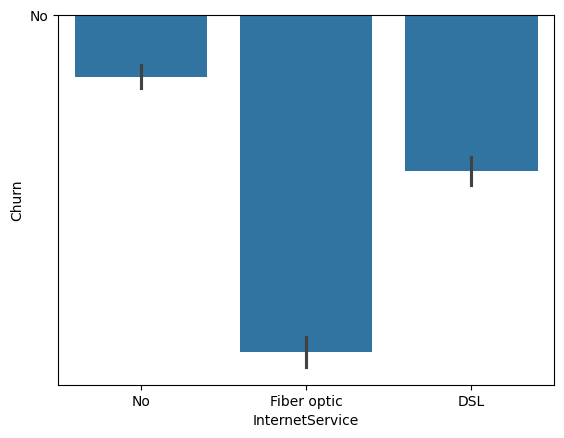

OnlineSecurity     
No                     2982
Yes                    1713
No internet service    1291
Name: count, dtype: int64



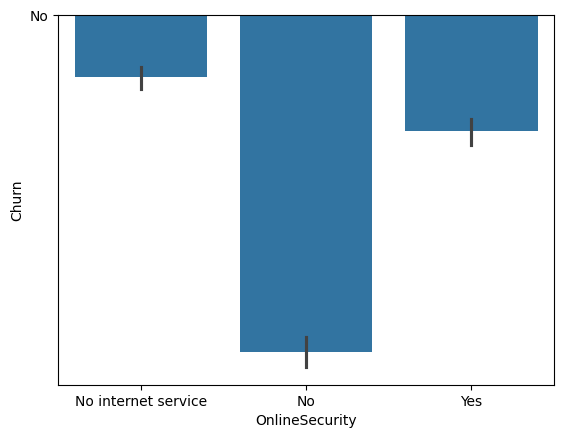

OnlineBackup       
No                     2605
Yes                    2090
No internet service    1291
Name: count, dtype: int64



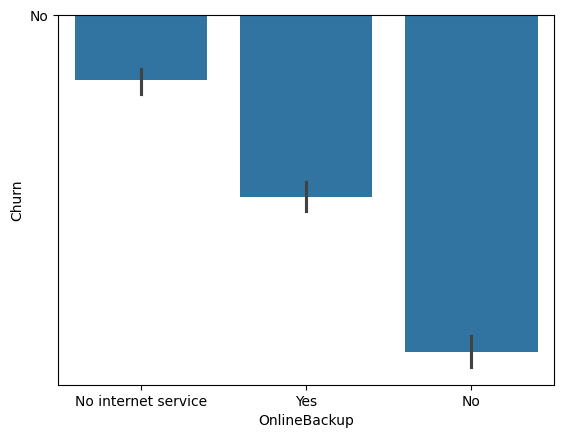

DeviceProtection   
No                     2640
Yes                    2055
No internet service    1291
Name: count, dtype: int64



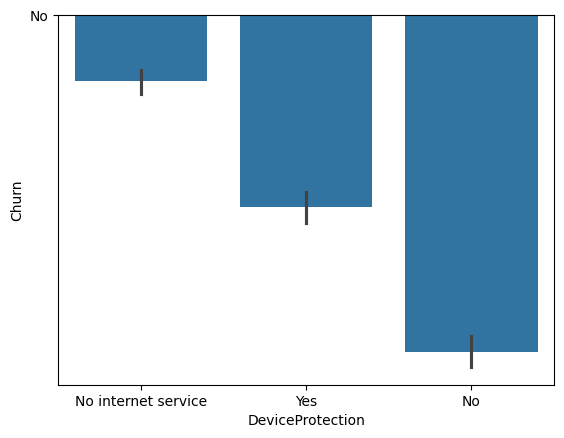

TechSupport        
No                     2960
Yes                    1735
No internet service    1291
Name: count, dtype: int64



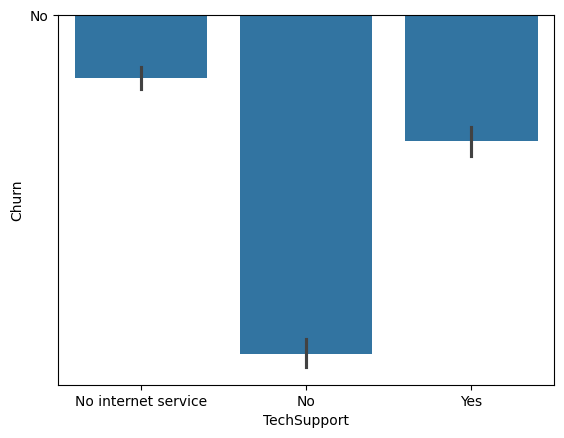

StreamingTV        
No                     2389
Yes                    2306
No internet service    1291
Name: count, dtype: int64



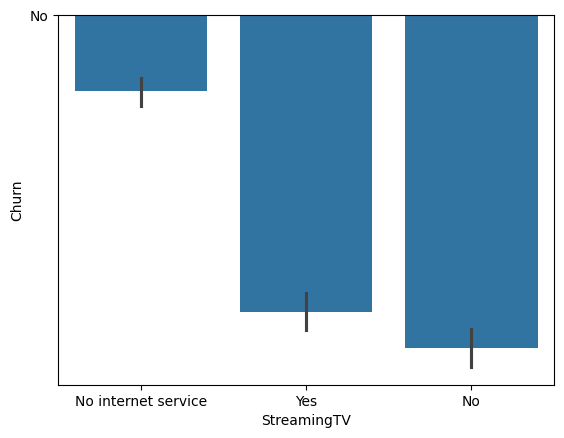

StreamingMovies    
No                     2356
Yes                    2339
No internet service    1291
Name: count, dtype: int64



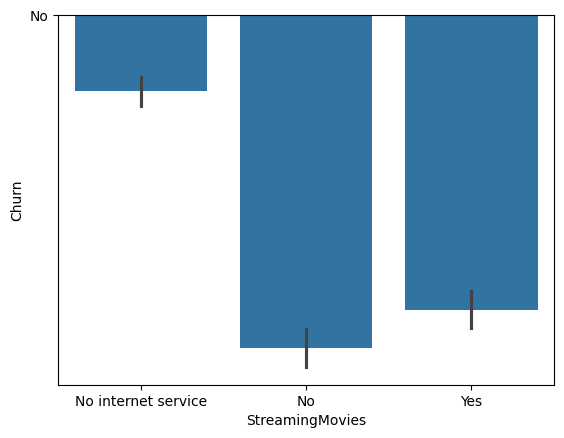

Contract      
Month-to-month    3269
Two year          1441
One year          1276
Name: count, dtype: int64



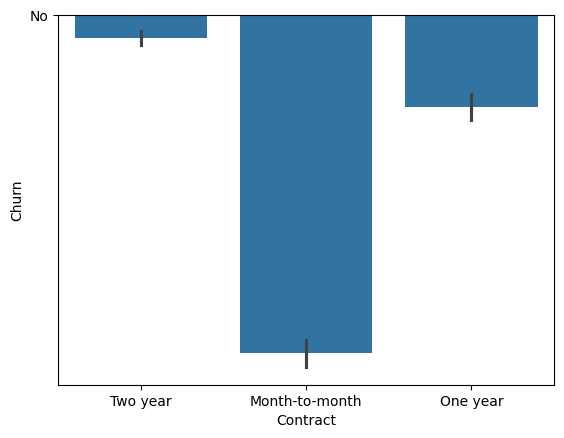

PaperlessBilling
Yes                 3528
No                  2458
Name: count, dtype: int64



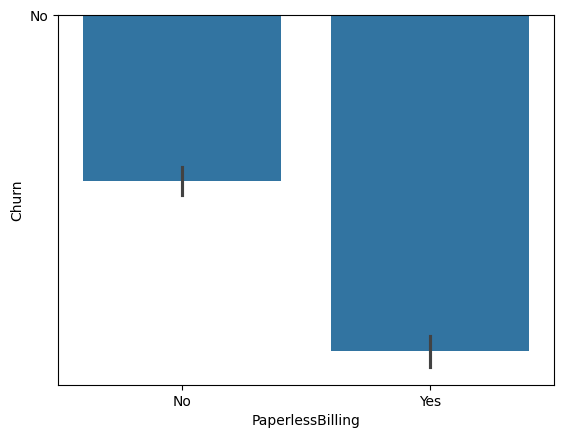

PaymentMethod            
Electronic check             2006
Mailed check                 1369
Bank transfer (automatic)    1308
Credit card (automatic)      1303
Name: count, dtype: int64



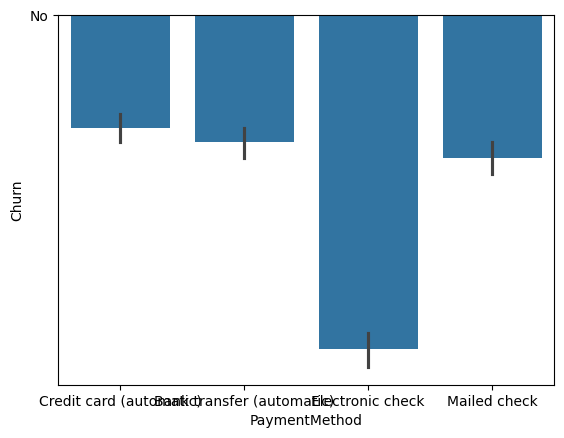

In [13]:
for col in cat_cols:
    print(f'{data[[col]].value_counts()}\n')
    sns.barplot(data=data, x=col, y=target_col)
    plt.show()

Проверим целевую переменную на дисбаланс классов

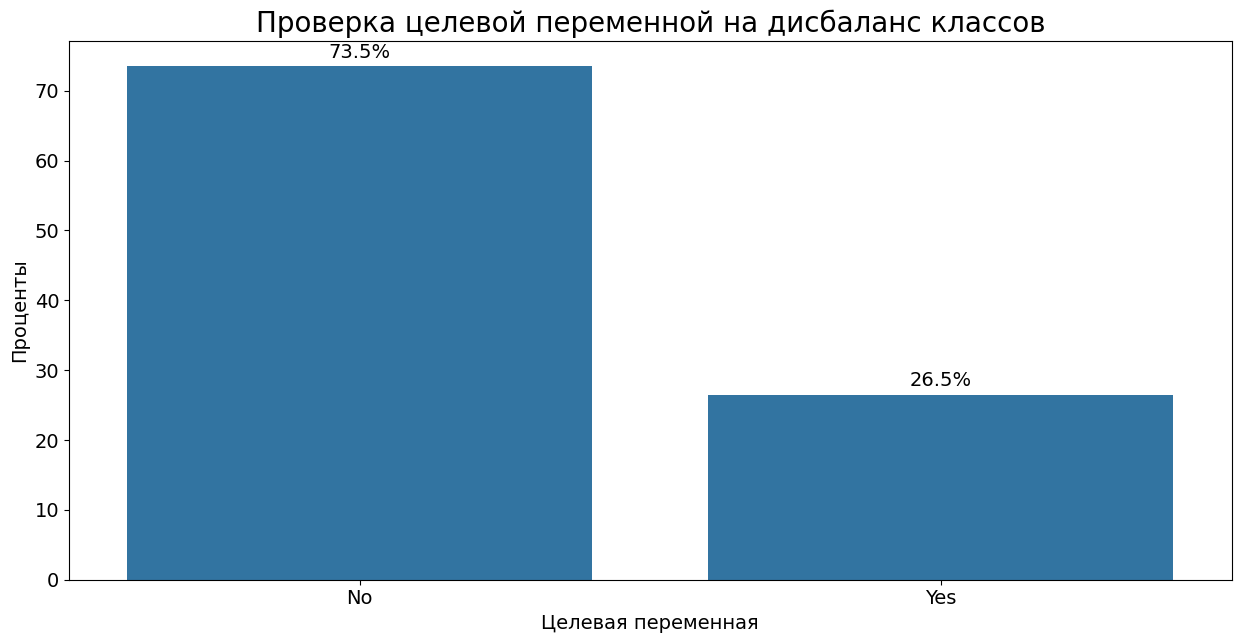

In [14]:
def plot_text(ax: plt.Axes):
    """
    Вывод текста на графике barplot
    """
    for p in ax.patches:
        percentage = '{:.1f}%'.format(p.get_height())
        ax.annotate(
            percentage,  # текст
            # координата xy
            (p.get_x() + p.get_width() / 2., p.get_height()),
            # центрирование
            ha='center',
            va='center',
            xytext=(0, 10),
            # точка смещения относительно координаты
            textcoords='offset points',
            fontsize=14)


# нормирование на размер датасета
norm_target = (data.Churn.value_counts(
    normalize=True).mul(100).rename('percent').reset_index())

plt.figure(figsize=(15, 7))
ax = sns.barplot(x='Churn', y='percent', data=norm_target)
plot_text(ax)

plt.title('Проверка целевой переменной на дисбаланс классов', fontsize=20)
plt.xlabel('Целевая переменная', fontsize=14)
plt.ylabel('Проценты', fontsize=14)

plt.xticks(fontsize=14)
plt.yticks(fontsize=14)
plt.show()

Можно сделать вывод, что присутствует дисбаланс классов

# 3. Построение моделей для прогнозирования оттока

In [23]:
from sklearn.linear_model import LogisticRegression, LogisticRegressionCV
from sklearn.model_selection import train_test_split, GridSearchCV, StratifiedKFold
from sklearn.preprocessing import StandardScaler, RobustScaler, LabelEncoder, OneHotEncoder
from sklearn.pipeline import make_pipeline
from sklearn.metrics import roc_auc_score


RAND = 16

In [19]:
df_dummies = pd.get_dummies(data, columns=cat_cols, dtype=int)

In [20]:
X = df_dummies.drop('Churn', axis=1)
y = df_dummies['Churn'].values

In [22]:
X_train, X_test, y_train, y_test = train_test_split(X,
                                                    y,
                                                    test_size=0.2,
                                                    stratify=y,
                                                    random_state=RAND)

In [24]:
sc = StandardScaler()
X_train_std = sc.fit_transform(X_train)
X_test_std = sc.transform(X_test)

In [25]:
lr = LogisticRegression(random_state=RAND, class_weight='balanced')

In [26]:
lr.fit(X_train_std, y_train)

LogisticRegression(class_weight='balanced', random_state=16)

In [27]:
y_pred = lr.predict(X_test_std)
y_score = lr.predict_proba(X_test_std)

In [28]:
roc_auc_score(y_test, y_score[:, 1])

0.8725235849056604

In [29]:
parameters_grid = {
    'penalty': ['l1', 'l2', 'elasticnet', 'none'],
    'C': np.logspace(-2, 3, num=3),
    'solver': ['liblinear', 'saga', 'lbfgs', 'sag'],
    'class_weight': ['balanced'],
    'random_state': [RAND]
}

lr = LogisticRegression()
cv = StratifiedKFold(n_splits=5, shuffle=True, random_state=RAND)

grid_cv = GridSearchCV(lr,
                       parameters_grid,
                       scoring='roc_auc',
                       cv=cv,
                       verbose=1)

In [30]:
%%time
# производим обучение по сетке
grid_cv.fit(X_train_std, y_train)

Fitting 5 folds for each of 48 candidates, totalling 240 fits


/home/marina/analytics_for_telecom/.venv/lib/python3.10/site-packages/sklearn/linear_model/_logistic.py:1183: FutureWarning: `penalty='none'`has been deprecated in 1.2 and will be removed in 1.4. To keep the past behaviour, set `penalty=None`.
  warnings.warn(
/home/marina/analytics_for_telecom/.venv/lib/python3.10/site-packages/sklearn/linear_model/_logistic.py:1193: UserWarning: Setting penalty=None will ignore the C and l1_ratio parameters
  warnings.warn(
/home/marina/analytics_for_telecom/.venv/lib/python3.10/site-packages/sklearn/linear_model/_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/home/marina/analytics_for_telecom/.venv/lib/python3.10/site-packages/sklearn/linear_model/_logistic.py:1183: FutureWarning: `penalty='none'`has been deprecated in 1.2 and will be removed in 1.4. To keep the past behaviour, set `penalty=None`.
  warnings.warn(
/home/marina/analytics_for_telecom/.venv/lib/python3.10/site-packages/

CPU times: user 59.7 s, sys: 18.5 s, total: 1min 18s
Wall time: 45.8 s


/home/marina/analytics_for_telecom/.venv/lib/python3.10/site-packages/sklearn/linear_model/_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


GridSearchCV(cv=StratifiedKFold(n_splits=5, random_state=16, shuffle=True),
             estimator=LogisticRegression(),
             param_grid={'C': array([1.00000000e-02, 3.16227766e+00, 1.00000000e+03]),
                         'class_weight': ['balanced'],
                         'penalty': ['l1', 'l2', 'elasticnet', 'none'],
                         'random_state': [16],
                         'solver': ['liblinear', 'saga', 'lbfgs', 'sag']},
             scoring='roc_auc', verbose=1)

In [31]:
grid_cv.best_score_

0.83220218711567

In [32]:
grid_cv.best_params_

{'C': 0.01,
 'class_weight': 'balanced',
 'penalty': 'none',
 'random_state': 16,
 'solver': 'saga'}

In [34]:
from catboost import CatBoostClassifier

In [35]:
X = data.drop('Churn', axis=1)
y = data['Churn'].values

In [36]:
X_train, X_valid, y_train, y_valid = train_test_split(X,
                                                      y,
                                                      test_size=0.2,
                                                      random_state=RAND)

In [37]:
clf = CatBoostClassifier()
clf.fit(X_train,
        y_train,
        eval_set=(X_valid, y_valid),
        cat_features=cat_cols,
        verbose=1)

Learning rate set to 0.046656
0:	learn: 0.6627175	test: 0.6611622	best: 0.6611622 (0)	total: 67ms	remaining: 1m 6s
1:	learn: 0.6368449	test: 0.6335700	best: 0.6335700 (1)	total: 80.9ms	remaining: 40.4s
2:	learn: 0.6117457	test: 0.6061994	best: 0.6061994 (2)	total: 95.3ms	remaining: 31.7s
3:	learn: 0.5903974	test: 0.5834600	best: 0.5834600 (3)	total: 107ms	remaining: 26.6s
4:	learn: 0.5717684	test: 0.5635069	best: 0.5635069 (4)	total: 122ms	remaining: 24.4s
5:	learn: 0.5554258	test: 0.5462673	best: 0.5462673 (5)	total: 137ms	remaining: 22.7s
6:	learn: 0.5454541	test: 0.5348458	best: 0.5348458 (6)	total: 144ms	remaining: 20.4s
7:	learn: 0.5330633	test: 0.5212963	best: 0.5212963 (7)	total: 154ms	remaining: 19.1s
8:	learn: 0.5223526	test: 0.5097106	best: 0.5097106 (8)	total: 166ms	remaining: 18.3s
9:	learn: 0.5125497	test: 0.4990582	best: 0.4990582 (9)	total: 180ms	remaining: 17.8s
10:	learn: 0.5044843	test: 0.4899971	best: 0.4899971 (10)	total: 187ms	remaining: 16.8s
11:	learn: 0.4983037	

In [38]:
roc_auc_score(y_valid, clf.predict_proba(X_valid)[:, 1])

0.8585974095381809

In [41]:
grid = {
    "n_estimators": [1000],
    "learning_rate": np.arange(0.01, 0.3, 0.01),
    "boosting_type": ['Ordered', 'Plain'],
    "max_depth": list(range(3, 12)),
    "l2_leaf_reg": np.logspace(-5, 2, 5),
    "bootstrap_type": ["Bayesian", "Bernoulli", "MVS", "No"],
    'border_count': [128, 254],
    'grow_policy': ["SymmetricTree", "Depthwise", "Lossguide"],
    "random_state": [RAND],
    "colsample_bylevel": np.arange(0.5, 1.0, 0.1),
    'random_strength': range(10, 50),
    'od_wait': range(500, 2000),
    'leaf_estimation_iterations': range(1, 15),
}

model = CatBoostClassifier(eval_metric="AUC",
                           cat_features=cat_cols,
                           silent=True)

grid_search_result = model.randomized_search(grid,
                                             X=X_train,
                                             y=y_train,
                                             plot=True)

MetricVisualizer(layout=Layout(align_self='stretch', height='500px'))


bestTest = 0.8475566582
bestIteration = 59

Metric AUC is not calculated on train by default. To calculate this metric on train, add hints=skip_train~false to metric parameters.
0:	loss: 0.8475567	best: 0.8475567 (0)	total: 14.5s	remaining: 2m 10s

bestTest = 0.8435122719
bestIteration = 18

Metric AUC is not calculated on train by default. To calculate this metric on train, add hints=skip_train~false to metric parameters.
1:	loss: 0.8435123	best: 0.8475567 (0)	total: 50.3s	remaining: 3m 21s
Stopped by overfitting detector  (575 iterations wait)

bestTest = 0.8460725837
bestIteration = 36

Metric AUC is not calculated on train by default. To calculate this metric on train, add hints=skip_train~false to metric parameters.
2:	loss: 0.8460726	best: 0.8475567 (0)	total: 1m 5s	remaining: 2m 33s

bestTest = 0.8484827887
bestIteration = 590

Metric AUC is not calculated on train by default. To calculate this metric on train, add hints=skip_train~false to metric parameters.
3:	loss: 0.8484828

In [42]:
grid_search_result['params']

{'border_count': 254,
 'leaf_estimation_iterations': 3,
 'random_seed': 16,
 'depth': 6,
 'random_strength': 18,
 'od_wait': 1971,
 'iterations': 1000,
 'rsm': 0.7,
 'learning_rate': 0.13,
 'l2_leaf_reg': 0.03162277660168379,
 'grow_policy': 'SymmetricTree',
 'boosting_type': 'Ordered',
 'bootstrap_type': 'Bayesian'}

In [43]:
clf_tun = CatBoostClassifier(**grid_search_result['params'])
clf_tun.fit(X_train,
            y_train,
            eval_set=(X_valid, y_valid),
            cat_features=cat_cols,
            verbose=1)

0:	learn: 0.6346525	test: 0.6297056	best: 0.6297056 (0)	total: 15.3ms	remaining: 15.3s
1:	learn: 0.5840408	test: 0.5729431	best: 0.5729431 (1)	total: 53ms	remaining: 26.5s
2:	learn: 0.5604565	test: 0.5461083	best: 0.5461083 (2)	total: 67.9ms	remaining: 22.6s
3:	learn: 0.5314844	test: 0.5143287	best: 0.5143287 (3)	total: 99ms	remaining: 24.6s
4:	learn: 0.5147304	test: 0.4946162	best: 0.4946162 (4)	total: 140ms	remaining: 27.8s
5:	learn: 0.5107694	test: 0.4886434	best: 0.4886434 (5)	total: 145ms	remaining: 24s
6:	learn: 0.5050577	test: 0.4813246	best: 0.4813246 (6)	total: 152ms	remaining: 21.5s
7:	learn: 0.4899655	test: 0.4657173	best: 0.4657173 (7)	total: 202ms	remaining: 25.1s
8:	learn: 0.4885903	test: 0.4631111	best: 0.4631111 (8)	total: 212ms	remaining: 23.3s
9:	learn: 0.4844725	test: 0.4576358	best: 0.4576358 (9)	total: 245ms	remaining: 24.3s
10:	learn: 0.4837197	test: 0.4559683	best: 0.4559683 (10)	total: 253ms	remaining: 22.7s
11:	learn: 0.4811059	test: 0.4520362	best: 0.4520362 (

In [44]:
roc_auc_score(y_valid, clf_tun.predict_proba(X_valid)[:, 1])

0.8575678267157093

In [45]:
grid_search_result['params']

{'border_count': 254,
 'leaf_estimation_iterations': 3,
 'random_seed': 16,
 'depth': 6,
 'random_strength': 18,
 'od_wait': 1971,
 'iterations': 1000,
 'rsm': 0.7,
 'learning_rate': 0.13,
 'l2_leaf_reg': 0.03162277660168379,
 'grow_policy': 'SymmetricTree',
 'boosting_type': 'Ordered',
 'bootstrap_type': 'Bayesian'}

# 4. Сравнение качества моделей

In [ ]:
### YOUR CODE HERE ###


